In [40]:
import numpy as np
from SiPANN import cross_coup
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact
from ipywidgets import widgets

## Verify our results to the papers

First lets compare some of our coefficients to theirs:

In [15]:
#theirs for a 450x220 waveguide at 1550nm wavelength
ae_theirs = 0.177967
ao_theirs = 0.049910
ge_theirs = 0.011898
go_theirs = 0.006601

#ours for the same size
inputs = np.array([[1550*.001, 450*.001, 220*.001]])
coeffs = cross_coup.DC_coeffs.predict(inputs)
ae_ours = coeffs[0,0]
ao_ours = coeffs[0,1]
ge_ours = coeffs[0,2]
go_ours = coeffs[0,3]

print("ae, theirs: {}\tours: {}\tdifference: {}".format(ae_theirs,ae_ours,np.abs(ae_theirs-ae_ours)))
print("ao, theirs: {}\tours: {}\tdifference: {}".format(ao_theirs,ao_ours,np.abs(ao_theirs-ao_ours)))
print("ge, theirs: {}\tours: {}\tdifference: {}".format(ge_theirs,ge_ours,np.abs(ge_theirs-ge_ours)))
print("go, theirs: {}\tours: {}\tdifference: {}".format(go_theirs,go_ours,np.abs(go_theirs-go_ours))) 

ae, theirs: 0.177967	ours: 0.14255197356760618	difference: 0.035415026432393804
ao, theirs: 0.04991	ours: 0.05895925402910507	difference: 0.009049254029105065
ge, theirs: 0.011898	ours: 0.009976074918768063	difference: 0.0019219250812319375
go, theirs: 0.006601	ours: 0.0072433517785839285	difference: 0.0006423517785839284


And a plot to compare as well

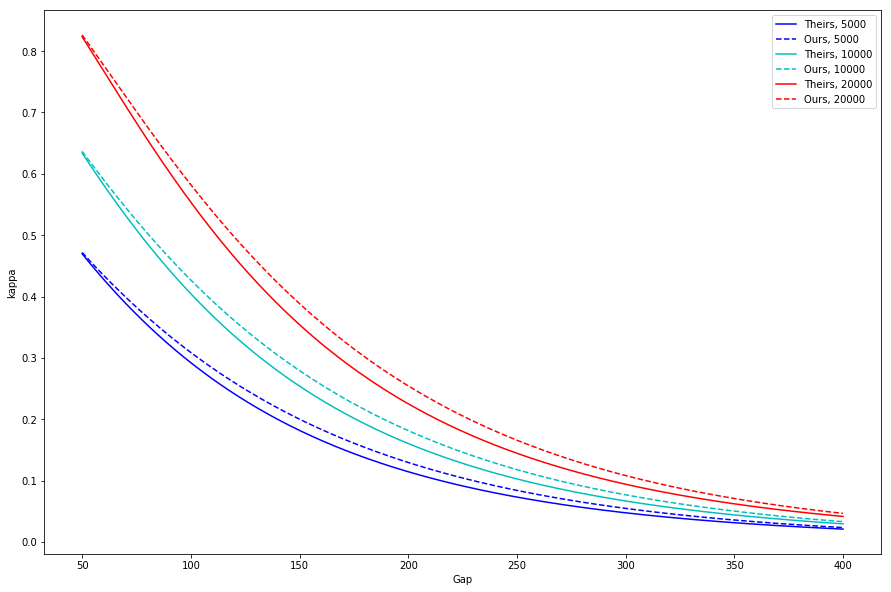

In [37]:
wave = 1550
w = 450
t = 220
dom = np.linspace(50,400,1000)
r = [5000,10000,20000]
colors = ['b','c','r']

plt.figure(figsize=(15,10))
for i in range(3):
    plt.plot(dom, cross_coup.rr_450_220(wave, w, t, r[i], dom),colors[i],label="Theirs, "+str(r[i]))
    plt.plot(dom, cross_coup.rr(wave, w, t, r[i], dom),colors[i]+'--',label="Ours, "+str(r[i]))
    
plt.legend(loc='upper right')
plt.xlabel('Gap')
plt.ylabel('kappa')
    
plt.show()

Check the relative errors for each plot

In [38]:
theirs = []
ours = []
for i in range(3):
    theirs.append(cross_coup.rr_450_220(wave, w, t, r[i], dom))
    ours.append(cross_coup.rr(wave, w, t, r[i], dom))
for i in range(3):  
    print("For radius {} \t re: {}".format(r[i], np.mean(np.abs((theirs[i] - ours[i])/theirs[i]))))

For radius 5000 	 re: 0.11385924707796191
For radius 10000 	 re: 0.11302413978733923
For radius 20000 	 re: 0.11153362417850504


And an interactive plot to play around with it

In [44]:
dom = np.linspace(50,500)
def f(wavelength, width, thickness, radius):
    plt.figure(figsize=(15,10))
    plt.ylim((0,1))
    plt.xlabel('Gap')
    plt.ylabel('Kappa')
    plt.plot(dom, cross_coup.rr(wavelength, width, thickness, radius, dom))
    plt.show()
interact(f, wavelength=widgets.FloatSlider(min=1530,max=1580,value=1550), 
             width=widgets.FloatSlider(min=400,max=600,value=400), 
             thickness=widgets.FloatSlider(min=210,max=230,value=220), 
             radius=widgets.FloatSlider(min=5000,max=20000,value=10000))

interactive(children=(FloatSlider(value=1550.0, description='wavelength', max=1580.0, min=1530.0), FloatSlider…

<function __main__.f(wavelength, width, thickness, radius)>